In [ ]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from fastf1 import plotting
fp = fastf1.get_session(2023, "Canada", 'FP2')
fp.load()

In [20]:
drivers = pd.unique(fp.laps['Driver'])
driver_laps = fp.laps.pick_drivers(drivers)

In [21]:
driver_laps = driver_laps.loc[((driver_laps['Driver'] == "VER")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==4)) |
                            ((driver_laps['Driver'] == "ALO")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==5)) |
                            ((driver_laps['Driver'] == "LEC")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==4)) |
                            ((driver_laps['Driver'] == "SAI")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==4)) |
                            ((driver_laps['Driver'] == "PER")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==6)) |
                            ((driver_laps['Driver'] == "HAM")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==1)) |
                            ((driver_laps['Driver'] == "RUS")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==1)) ]
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

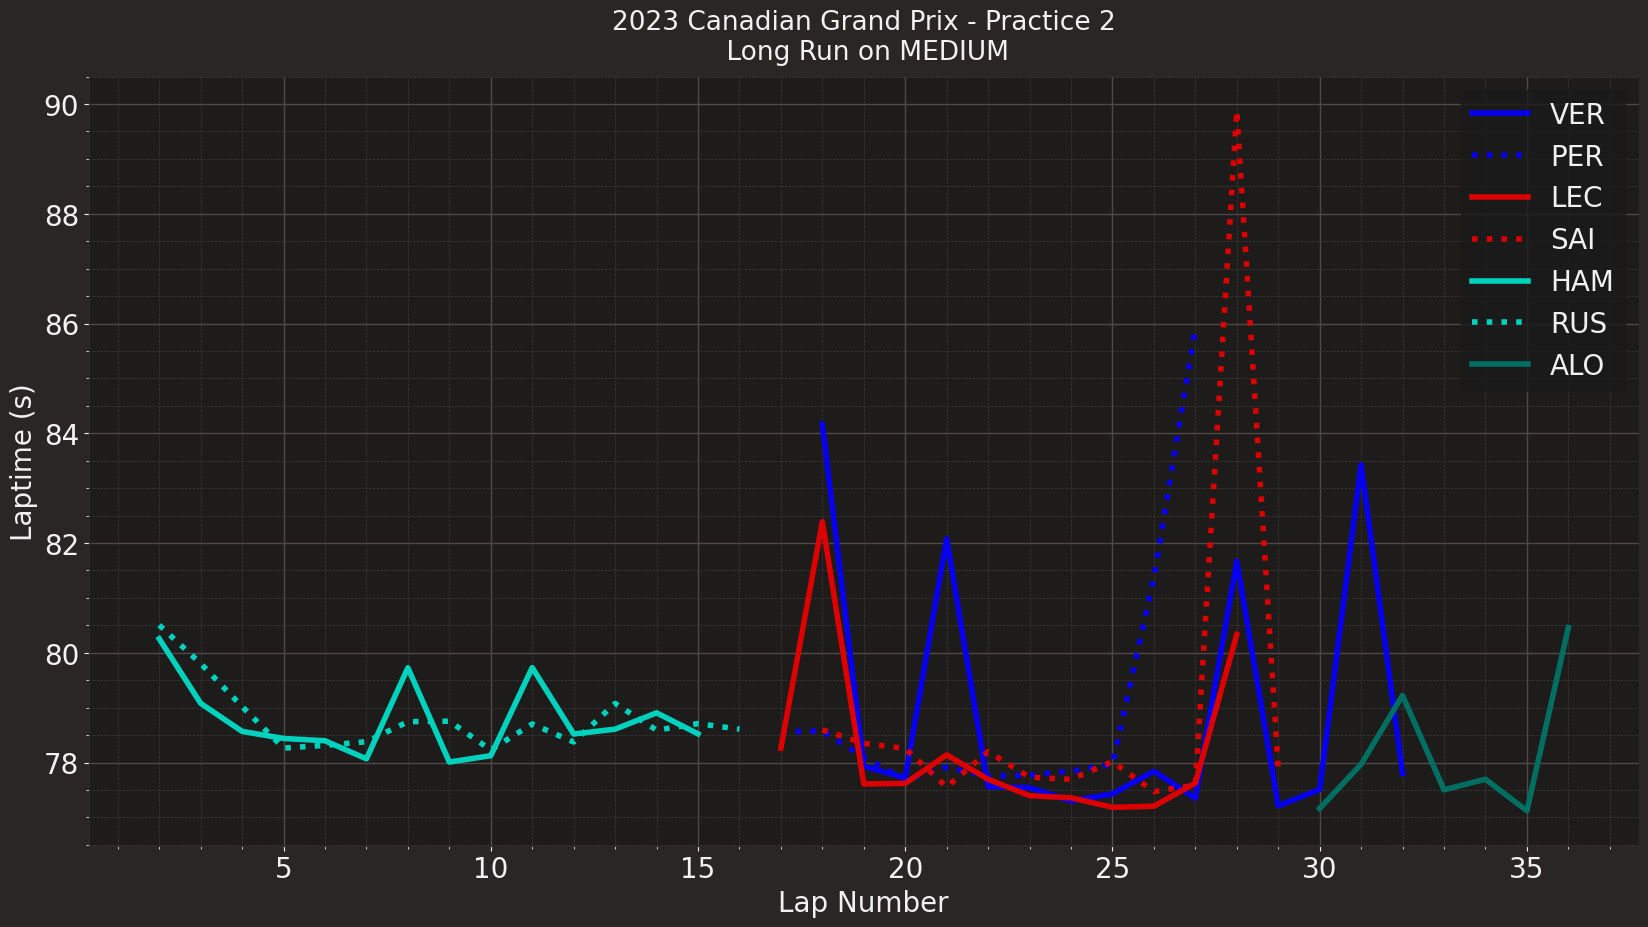

In [25]:

driver_laps = driver_laps.drop(driver_laps[driver_laps['LapTime(s)'] > 110].index)
drivers_to_visualize = ["VER", "PER", "LEC", "SAI", "HAM", "RUS", "ALO"]

# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [20, 10]
plotting.setup_mpl()
# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots()

# Lap-by-lap longrun comparison
for driver in drivers_to_visualize:
    single_driver_laps = driver_laps.pick_driver(driver)[['Driver', 'LapNumber', 'LapTime(s)', 'Team', 'TyreLife']]
  
    # Select all the laps from that driver
    single_driver_laps = single_driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(single_driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = single_driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    y = seconds=single_driver_laps['LapTime(s)']
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y, label=driver, color=plotting.team_color(team), linestyle=linestyle, linewidth=4)
    
    # Append labels
    ax.set_ylabel("Laptime (s)", size=20)
    ax.set_xlabel("Lap Number", size=20)
    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\n Long Run on MEDIUM")

    # Generate legend
    ax.legend(prop={'size': 20})
    ax.tick_params(labelsize=20)
    visualized_teams.append(team)

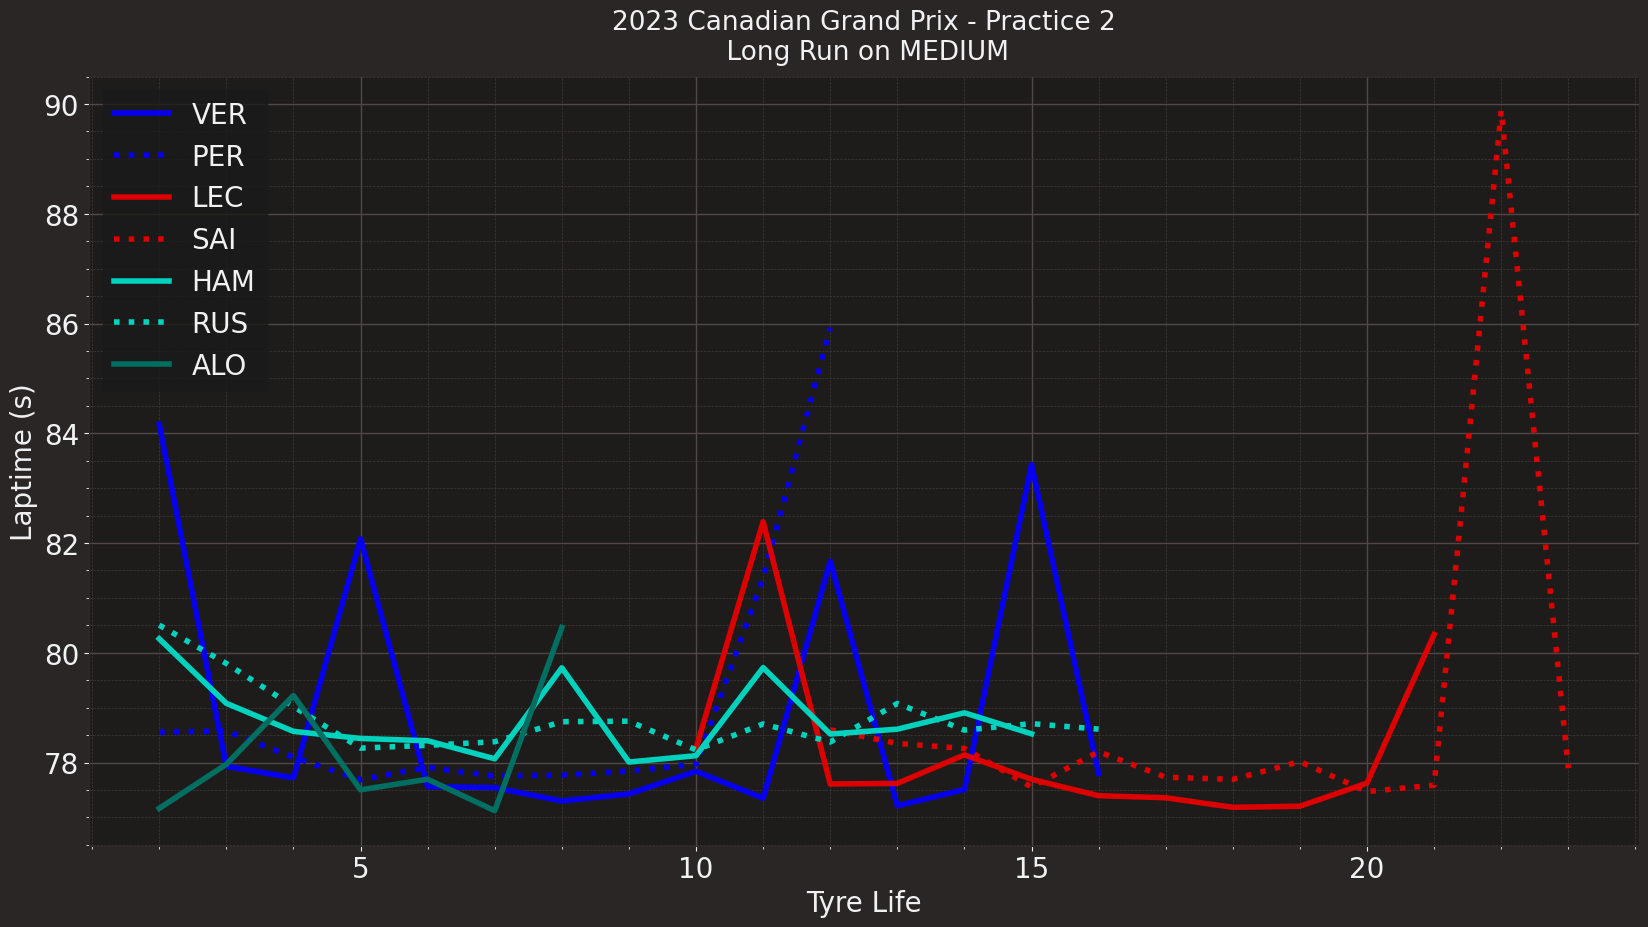

In [26]:

driver_laps = driver_laps.drop(driver_laps[driver_laps['LapTime(s)'] > 110].index)
drivers_to_visualize = ["VER", "PER", "LEC", "SAI", "HAM", "RUS", "ALO"]

# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [20, 10]
plotting.setup_mpl()
# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots()

# Lap-by-lap longrun comparison
for driver in drivers_to_visualize:
    single_driver_laps = driver_laps.pick_driver(driver)[['Driver', 'LapNumber', 'LapTime(s)', 'Team', 'TyreLife']]
  
    # Select all the laps from that driver
    single_driver_laps = single_driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(single_driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = single_driver_laps['TyreLife']
    
    # Y-coordinate a smoothed line between all the laptimes
    y = seconds=single_driver_laps['LapTime(s)']
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y, label=driver, color=plotting.team_color(team), linestyle=linestyle, linewidth=4)
    
    # Append labels
    ax.set_ylabel("Laptime (s)", size=20)
    ax.set_xlabel("Tyre Life", size=20)
    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\n Long Run on MEDIUM")

    # Generate legend
    ax.legend(prop={'size': 20})
    ax.tick_params(labelsize=20)
    visualized_teams.append(team)